<a href="https://colab.research.google.com/github/extremistLab/Online-Payment-Fraud-Detection-using-Machine-Learning-in-Python/blob/main/Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Payment Fraud **Detection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('/content/onlinefraud.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260509 entries, 0 to 260508
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260509 non-null  int64  
 1   type            260509 non-null  object 
 2   amount          260509 non-null  float64
 3   nameOrig        260509 non-null  object 
 4   oldbalanceOrg   260509 non-null  float64
 5   newbalanceOrig  260509 non-null  float64
 6   nameDest        260508 non-null  object 
 7   oldbalanceDest  260508 non-null  float64
 8   newbalanceDest  260508 non-null  float64
 9   isFraud         260508 non-null  float64
 10  isFlaggedFraud  260508 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.9+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,260509.000000,2.605090e+05,2.605090e+05,2.605090e+05,2.605080e+05,2.605080e+05,260508.000000,260508.0
mean,10.904337,1.784775e+05,8.841306e+05,9.027391e+05,9.611855e+05,1.194126e+06,0.000641,0.0
std,2.414674,3.123849e+05,2.820156e+06,2.857684e+06,2.366205e+06,2.612450e+06,0.025311,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.246374e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.483560e+04,1.878000e+04,0.000000e+00,6.998200e+04,1.682056e+05,0.000000,0.0
75%,13.000000,2.316096e+05,1.846340e+05,2.230885e+05,8.215832e+05,1.225196e+06,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


## **Data Visualization**

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)

print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

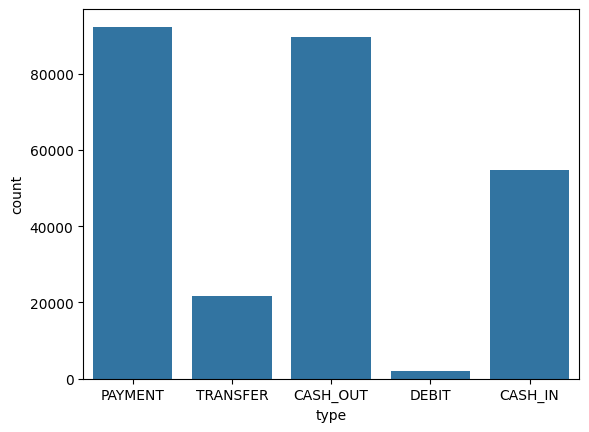

In [ ]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

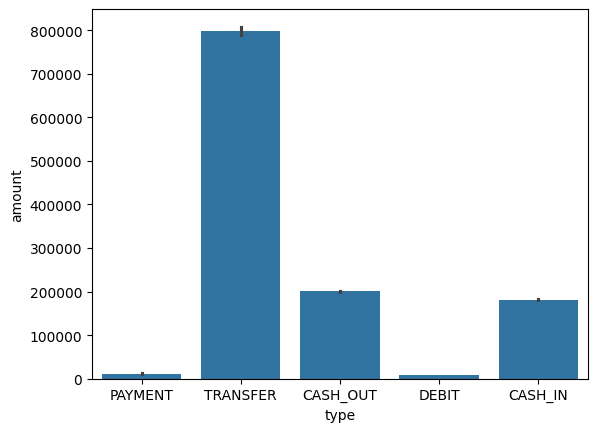

In [ ]:
sns.barplot(x='type', y='amount', data=data)

Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount.

In [ ]:
data['isFraud'].value_counts()

isFraud
0.0    260341
1.0       167
Name: count, dtype: int64

<ipython-input-13-67dd6c087454>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

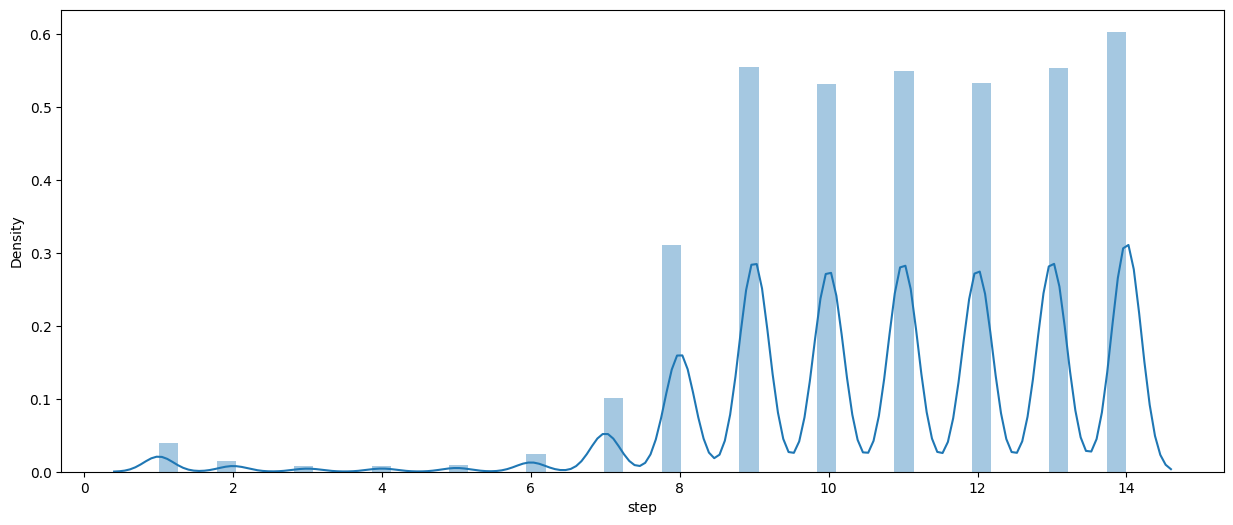

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(data['step'], bins=50)

The graph shows the maximum distribution among 200 to 400 of step.

Now, Let’s find the correlation among different features using Heatmap.

<Axes: >

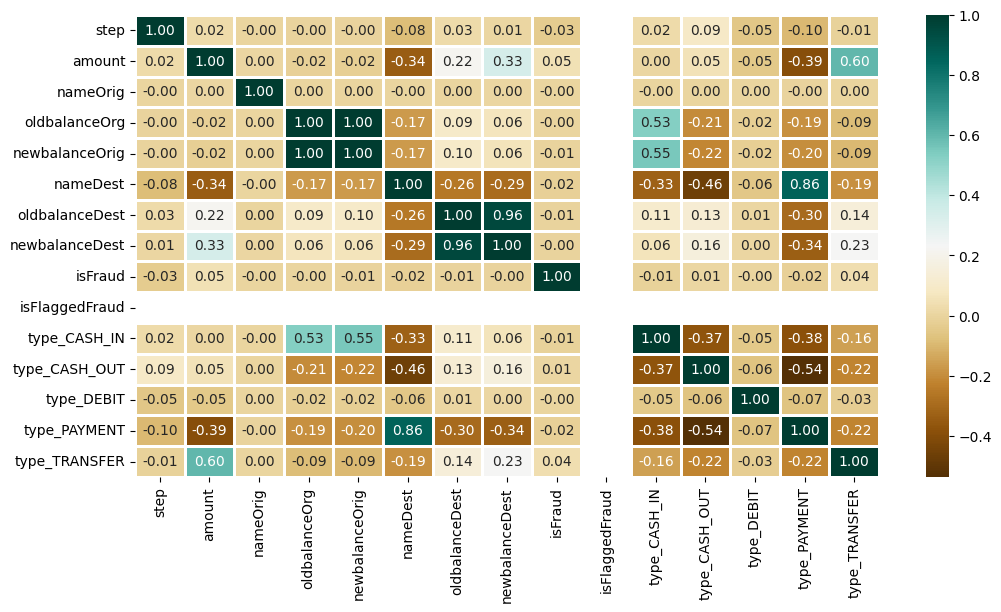

In [ ]:
# Convert 'type' column to numerical representation
data_encoded = pd.get_dummies(data, columns=['type'])

# Identify columns with object (string) dtype
object_cols = data_encoded.select_dtypes(include='object').columns

# Convert object columns to numerical using a suitable method (e.g., LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

plt.figure(figsize=(12, 6))
sns.heatmap(data_encoded.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

## Data Preprocessing
This step includes the following :


*   Encoding of Type column

*   Dropping irrelevant columns like nameOrig, nameDest
*  Data Splitting

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


In [ ]:

X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [ ]:
X.shape, y.shape

((260509, 11), (260509,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Model Training

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (NaN) with the most frequent value for the target
imputer_X = SimpleImputer(strategy='mean') # Imputer for features
imputer_y = SimpleImputer(strategy='most_frequent') # Imputer for target

# Fit the imputer to the training data and transform both training and testing data
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# Impute missing values in y_train using most frequent value
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

models = [LogisticRegression(), XGBClassifier(),
          SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    # Use the imputed data for training
    models[i].fit(X_train_imputed, y_train_imputed)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train_imputed)[:, 1]
    print('Training Accuracy : ', ras(y_train_imputed, train_preds))

    # Use the imputed data for predictions as well
    y_preds = models[i].predict_proba(X_test_imputed)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9265922576585672
Validation Accuracy :  0.9158241582225137

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9937994792674003

SVC(probability=True) : 
Training Accuracy :  0.8671595257431755

Model Evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


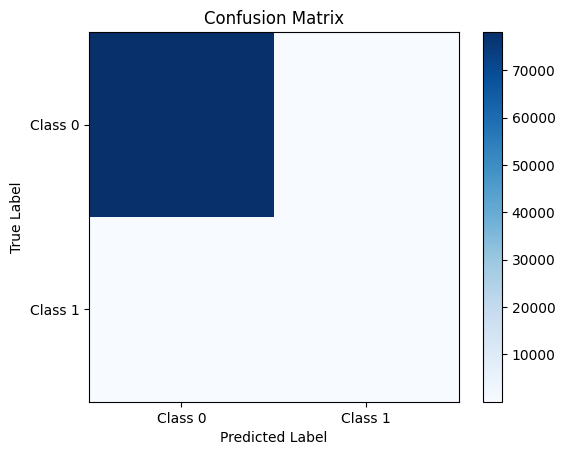

In [ ]:
!pip install --upgrade scikit-learn # Upgrade scikit-learn to the latest version

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # Import matplotlib for plotting

# ... (rest of your code)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, models[1].predict(X_test_imputed))

# Display the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()